In [13]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


In [14]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [15]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

### A. With 2 features

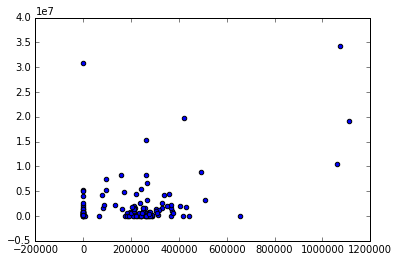

In [33]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)

for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()


In [34]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)
pred=kmeans.predict(data)

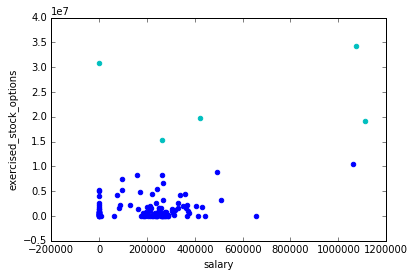

In [38]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

#### Feature Rescaling

In [60]:
def FeatureScaling(X,test):
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler()
    rescaled =  min_max_scaler.fit_transform(X)
    testrescale = min_max_scaler.transform(test)
    return str(testrescale)
salary = []
exercised_stock_options = []
for key in data_dict:
    if data_dict[key]["salary"]!='NaN':
        salary.append([data_dict[key]["salary"]])
    if data_dict[key]["exercised_stock_options"]!='NaN':
        exercised_stock_options.append([data_dict[key]["exercised_stock_options"]])
salary = numpy.array(salary,float)
print "Rescaled Salary: ",FeatureScaling(salary,numpy.array([[200000.]]))
exercised_stock_options = numpy.array(exercised_stock_options,float)
print "Rescaled Exercised Stock Options: ",FeatureScaling(exercised_stock_options,numpy.array([[1000000.]]))

Rescaled Salary:  [[ 0.17962407]]
Rescaled Exercised Stock Options:  [[ 0.02902059]]


### B. With 3 Features

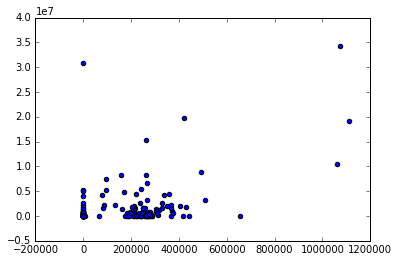

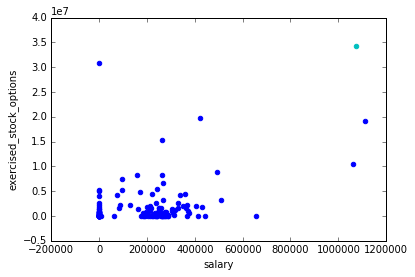

In [59]:
feature_3 = "total_payments"
features_list.append(feature_3)
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)
pred=kmeans.predict(data)
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

### Minimum and Maximum exercised_stock_options

In [67]:
min_eso=float("inf")
max_eso=0
for key in data_dict:
    tmp=data_dict[key]["exercised_stock_options"]
    if tmp!='NaN':
        max_eso=max(tmp,max_eso)
        min_eso=min(tmp,min_eso)
print "Maximum exercised_stock_options: ",max_eso
print "Minimum exercised_stock_options: ",min_eso

Maximum exercised_stock_options:  34348384
Minimum exercised_stock_options:  3285


### Minimum and Maximum salary

In [68]:
min_sal=float("inf")
max_sal=0
for key in data_dict:
    tmp=data_dict[key]["salary"]
    if tmp!='NaN':
        max_sal=max(tmp,max_sal)
        min_sal=min(tmp,min_sal)
print "Maximum salary: ",max_sal
print "Minimum salary: ",min_sal

Maximum salary:  1111258
Minimum salary:  477
